<a href="https://colab.research.google.com/github/Marc-g-Z/Marc-g-Z.github.io/blob/master/SafeGraph_Core_Places_Starter_Notebook_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SafeGraph Data Starter Notebook
#### Introduction to [Core Places](https://docs.safegraph.com/docs#section-core-places)

Hello! The goal of this notebook is to help you ramp up faster using **python** and **pandas** to answer questions from Safegraph Data. 

* **Core Places**: Base information about a point of interest (POI) such as location name, address and brand association for top ~5,000 national brands. Available for ~5MM POI.


<<< ***Don't forget that there is a Table Of Contents in the left panel of your Colab notebook! Check it out!***


**In this notebook we will answer questions like:** 
* How many restaurants are there in Ohio?
* What is the ratio of fast-food to full-service restaurants in Ohio?
* What are the most common words used in restaurant names?
* Which cities in Ohio have the fewest restaurants per capita?
* Which chain restaurants have the largest number of locations that are open 24-7?
* Which chain restaurants are open the most hours / week?


-------------------

The default datasets for this demo are **SafeGraph Core Places**
* State = ['Ohio']
* Categories = ['Full-Service Restaurants', 'Limited-Service Restaurants']) 
* Version = August 2019
* These data can be downloaded from [SafeGraph Data Bar](https://shop.safegraph.com/). To get your own sample, use the discount code `CorePlacesStarterNotebook`. Or for the purposes of testing in this notebook, you can download these data from [this google drive](https://drive.google.com/open?id=1IbqY9Fu0YdIkXpldqj1cKdcINwDMN8sR).
* Or, feel free to load your own Core Places data.

--------------

Resources: 
* [SafeGraph Docs page](https://docs.safegraph.com)
* [CoLaboratory Introduction Page](https://colab.research.google.com/notebooks/welcome.ipynb)

Contact: 
* Please send us your ideas, feedback, bug discoveries and suggestions: datastories@safegraph.com

### Set Up

In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

SMALL_SIZE = 11
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# thanks https://stackoverflow.com/a/39566040/2098573

In [0]:
import platform
print("This notebook is running python version: {0}".format(platform.python_version()))
print("This notebook is running pandas version: {0}".format(pd.__version__))

# This is what the original author is running:
# This notebook is running python version: 3.6.8
# This notebook is running pandas version: 0.24.2

This notebook is running python version: 3.6.8
This notebook is running pandas version: 0.24.2


### Load the datasets

*  There are [several ways for you to load your data into this Colab notebook.](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

*  The easiest way is for you to upload CSVs directly from your local machine (see example code below).

*  If you don't have your own data, then feel free to use mine. I am reading the Ohio Restaurants data directly from a github repo.  

#### *Load the demo Core Places "Ohio Restaurants" data from Github*

In [0]:
raw_url = 'https://raw.githubusercontent.com/ryanfoxsquire/demodata/master/ohioRestaurants/Starter-OH-Restaurants-CORE_POI-2019-08-09/Starter-OH-Restaurants-CORE_POI-2019-08-09.csv'
sgCorePlaces = pd.read_csv(raw_url)


----------------

#### *If you want to use your own data instead of the demo data, then UNcomment and execute the following code*

*The notebook will prompt you to select a file from your local computer*

In [0]:
# # Use this to load your Core dataset

# from google.colab import files
# core_upload = files.upload()


In [0]:
# # Read Dataset
# myfilename = list(core_upload.keys())[0]
# print("reading : {0}".format(myfilename))
# sgCorePlaces = pd.read_csv(myfilename)

-----------------

Check that you've loaded data with columns we expect:

In [0]:
your_columns = sgCorePlaces.columns.sort_values().to_list()

problem = False
for this_column in ['brands', 'city', 'location_name', 'naics_code', 'open_hours', 'parent_safegraph_place_id', 'phone_number', 'safegraph_brand_ids', 'safegraph_place_id', 'state', 'street_address', 'sub_category', 'top_category', 'zip_code']:
  if(this_column not in your_columns):
     print("WARNING YOU ARE MISSING THE COLUMN: {0}\n Are you sure you loaded the correct dataset?".format(this_column))
     problem = True

if(problem):
  print("Uh oh! Are you sure you loaded SafeGraph Core Places data?")
else:
  print("Data looks great! Let's answer some questions!")

Data looks great! Let's answer some questions!


### `safegraph_place_id`: How many restaurants in Ohio? 


In [0]:
print("Note: each row is a unique Point of Interest (POI) \nand every POI has a unique safegraph_place_id.\n")


print("number of rows:")
print(sgCorePlaces.shape[0]) 
print("number of unique sgpids:")
print(sgCorePlaces.safegraph_place_id.unique().shape[0]) 
print("every row is a unique safegraph_place_id:")
print(sgCorePlaces.shape[0] == sgCorePlaces.safegraph_place_id.unique().shape[0]) 
print('\n')
print("# count rows by state")
sgCorePlaces.groupby(['state'])['safegraph_place_id'].count().to_frame(name = 'num_poi')

Note: each row is a unique Point of Interest (POI) 
and every POI has a unique safegraph_place_id.

number of rows:
20183
number of unique sgpids:
20183
every row is a unique safegraph_place_id:
True


# count rows by state


,num_poi
state,
oh,20183


### `top_category`, `sub_category` and `naics_code`: What is the ratio of fast-food to full-service restaurants in ohio?

* Safegraph Core Places has several columns about the **category** of the POI.

* Each `naics_code` represents a distinct category, and corresponds to exactly 1 `top_category` and 1 `sub_category`. 

* Read more about these columns [in the SafeGraph Places Manual](https://docs.safegraph.com/docs/places-manual#section--naics_code-top_category-sub_category-).


(By definition, the demo dataset only includes restaurants.)

In [0]:
print("All unique categories:")
sgCorePlaces[['naics_code', 'top_category', 'sub_category']].drop_duplicates().sort_values(['naics_code'])

All unique categories:


,naics_code,top_category,sub_category
2,722511,Restaurants and Other Eating Places,Full-Service Restaurants
0,722513,Restaurants and Other Eating Places,Limited-Service Restaurants


Show me counts of each category 


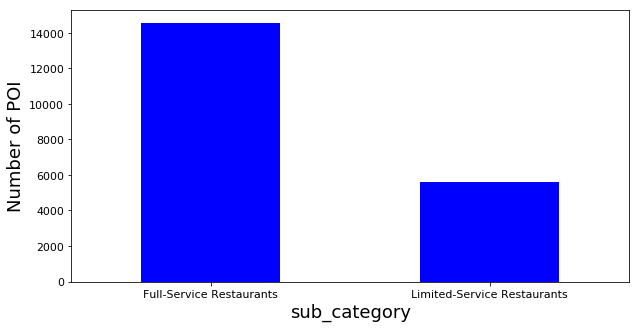

In [0]:
print("Show me counts of each category ")
category_counts = sgCorePlaces.groupby(['top_category', 'sub_category', 'naics_code'])['safegraph_place_id'].count().to_frame(name ='counts').reset_index()


# plot the data
plt.rcParams['figure.figsize'] = [10, 5]
category_counts[['sub_category', 'counts']].plot.bar(x='sub_category', y='counts', rot=0, legend=None, color = 'b')
plt.ylabel("Number of POI")
plt.show()

### `location_name`: What are common words used in restaurant names?

 

References: 
*Thanks [wordcloud](https://www.datacamp.com/community/tutorials/wordcloud-python) and [wordcloud demo from datacamp](https://www.datacamp.com/community/tutorials/wordcloud-python)!*


In [0]:
from wordcloud import WordCloud, STOPWORDS

There are 325455 words across all location_name for all 20183 poi.


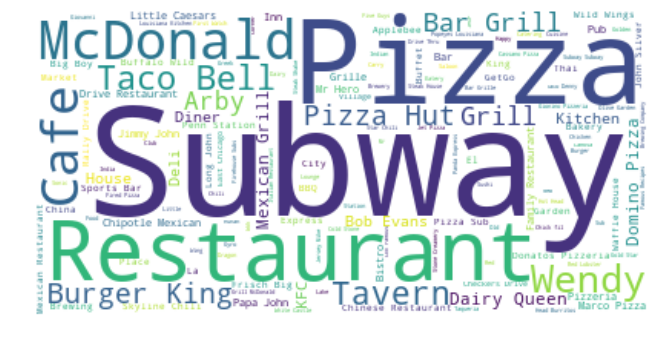

In [0]:
text = " ".join(name for name in sgCorePlaces.location_name) # all words in location_name
print ("There are {0} words across all location_name for all {1} poi.".format(len(text), sgCorePlaces.shape[0]))
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*Note: By default the wordcloud strips away things like " `'s` " (converting McDonald's --> McDonald).*

This is interesting, but major restaurant chains are dominating the visual. See the next section for where we exclude major corporate brands like Subway and Mcdonald's.  

### `brands`: What are the common words in restaurant names after excluding major restaurant chains?

One of the powerful features of SafeGraph Places data is the concept of "brand". SafeGraph tracks and tags 5000+ major retail brands (see full list in the brand_info.csv file that accompanies your data or check them out in [SafeGraph Data Bar](shop.safegraph.com)). 

This makes it easy to partition the data by whether or not a POI is part of a major corporate brand. 


In [0]:
print("Show me some example SafeGraph brands and their number of POI\n")
brand_counts = sgCorePlaces[~sgCorePlaces.brands.isnull()].groupby(['brands'])['safegraph_place_id'].count().reset_index(name = 'num_poi')
brand_counts.sort_values('num_poi', ascending = False).head(10)

Show me some example SafeGraph brands and their number of POI



,brands,num_poi
219,Subway,1129
143,McDonald's,611
247,Wendy's,410
222,Taco Bell,355
37,Burger King,338
175,Pizza Hut,327
5,Arby's,277
63,Dairy Queen,252
68,Domino's Pizza,248
122,KFC,188


In [0]:
print("How many POI in this dataset are branded vs not branded?")

sgCorePlaces_augmented = sgCorePlaces.copy()
sgCorePlaces_augmented['has_brand'] = ~sgCorePlaces_augmented.brands.isnull()

branded_counts = sgCorePlaces_augmented.groupby(['has_brand'])['safegraph_place_id'].count().reset_index()
branded_counts.columns = branded_counts.columns[0:-1].to_list() + ['counts'] # rename final column for clarity
branded_counts


How many POI in this dataset are branded vs not branded?


,has_brand,counts
0,False,11415
1,True,8768


**What are the common words in restaurant names *if we exclude major restaurant chains?***

If there are any words you want to exclude from the visual, add them to the list `stopwords` along with "boring_word1" and "boring_word2"

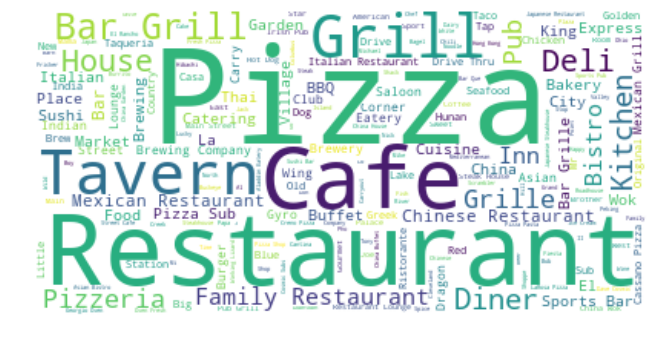

In [0]:
non_branded_poi = sgCorePlaces[sgCorePlaces.brands.isnull()]
text = " ".join(name for name in non_branded_poi.location_name) # all words in location_name for non-branded POI


stopwords = list(STOPWORDS) + ["boring_word1", "boring_word2"] # add any words you want to exclude from the word cloud
wordcloud = WordCloud(stopwords=stopwords,background_color="white", colormap = 'viridis').generate(text)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### What are the relative frequencies of the top words in the location_name of non-branded POI?

These data have 7421 unique words occuring 30745 times across 11415 POI


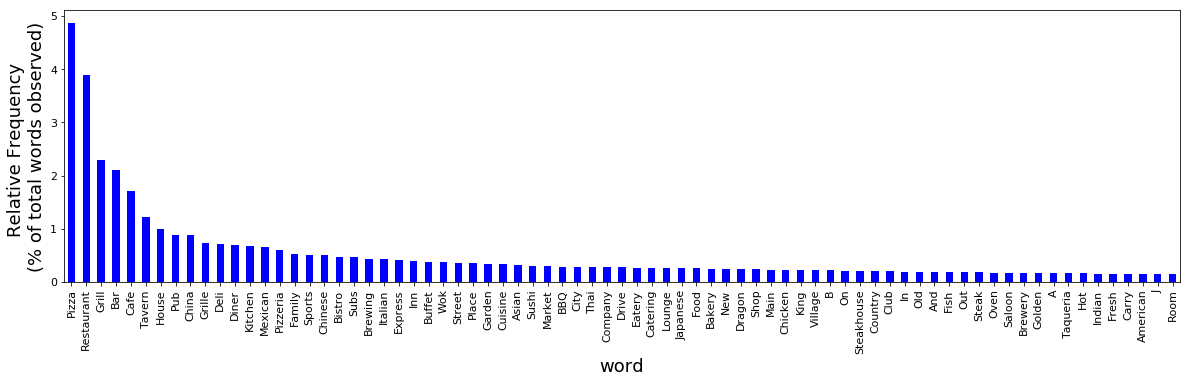

In [0]:
plt.rcParams['figure.figsize'] = [20, 5]
word_counts = pd.DataFrame(non_branded_poi.location_name.str.split(expand=True).stack().value_counts().reset_index())
word_counts.columns = ['word', 'counts']
stopwords = list(STOPWORDS) + ['&', 'El', 'La', 'The']
word_counts = word_counts[~word_counts.word.isin(stopwords)]
word_counts['counts_relative'] = word_counts.counts / word_counts.counts.sum()*100
word_counts.iloc[0:75].plot.bar(x='word', y='counts_relative', rot=90, legend=None, color = 'b')
print("These data have {0} unique words occuring {1} times across {2} POI".format(len(word_counts), word_counts.counts.sum(),non_branded_poi.shape[0]))
plt.ylabel("Relative Frequency \n(% of total words observed)")
plt.show()

### `city`: Which cities in Ohio have the most and fewest restaurants per capita?


In [0]:
print("Show me counts of each city \n ")
city_counts = sgCorePlaces.groupby(['city'])['safegraph_place_id'].count().reset_index(name='num_poi')
city_counts = city_counts.sort_values(['num_poi'], ascending = False)

print("This dataset has {0} unique cities".format(city_counts.shape[0]))
city_counts.head(10)


Show me counts of each city 
 
This dataset has 894 unique cities


,city,num_poi
183,columbus,1667
164,cincinnati,1462
168,cleveland,1092
209,dayton,577
786,toledo,552
5,akron,465
137,canton,289
890,youngstown,257
751,springfield,179
845,west chester,163


We can load population data from most recently available census data (2018) [ohio-demographics.com](https://www.ohio-demographics.com/cities_by_population).

This data was copied from ohio-demographics.com into a csv and [uploaded to github](https://github.com/ryanfoxsquire/demodata/blob/master/ohioRestaurants/ohio_cities.csv). 

*Note: To avoid the high variability associated with small-population cities, we will focus our analysis on all of the cities in Ohio with Population >= `min_pop_city`*.

In [0]:
min_pop_city = 7000 # Arbtirarily chosen, to exclude high-variability cities with small populations.

raw_url_ohio_cities = 'https://raw.githubusercontent.com/ryanfoxsquire/demodata/master/ohioRestaurants/ohio_cities.csv'
sgCorePlaces = pd.read_csv(raw_url)

ohio_city_pop = pd.read_csv(raw_url_ohio_cities)
ohio_city_pop['Population'] = [int(pop.replace(",","")) for pop in ohio_city_pop.Population] # clean-up
ohio_city_pop['City'] = ohio_city_pop['City'].str.lower() # to match sgCorePlaces
ohio_city_pop = ohio_city_pop[ohio_city_pop.Population >= min_pop_city]

ohio_city_pop.sort_values('Population', ascending = False).head()

,Rank,City,Population
0,1,columbus,892533
1,2,cleveland,383793
2,3,cincinnati,302605
3,4,toledo,274975
4,5,akron,198006


In [0]:
# join together the POI counts and the census population data
city_counts_merge = pd.merge(city_counts, ohio_city_pop, how = 'inner', left_on = 'city', right_on = 'City')
city_counts_merge.sort_values('Population', ascending = False).head()

,city,num_poi,Rank,City,Population
0,columbus,1667,1,columbus,892533
2,cleveland,1092,2,cleveland,383793
1,cincinnati,1462,3,cincinnati,302605
4,toledo,552,4,toledo,274975
5,akron,465,5,akron,198006


*Note: This was a rough merge on exact string name.*

*I don't expect that we perfectly merge every city, so let's examine what is getting dropped.*


In [0]:
# inspect non-merges to confirm we aren't missing major cities
print("We matched {0} cities that were in both datasets\n".format(city_counts_merge.shape[0]))

dropped_cities = pd.merge(ohio_city_pop, city_counts_merge, how = 'left')
dropped_cities = dropped_cities[dropped_cities.num_poi.isnull()]
print("We failed to merge {0} cities out of {1} in the ohio city dataset".format(dropped_cities.shape[0], ohio_city_pop.shape[0]))
print("Mean population for dropped cities = {0:.2f} \nMean population for matched cities = {1:.2f}".format(dropped_cities.Population.mean(),ohio_city_pop.Population.mean()))

We matched 206 cities that were in both datasets

We failed to merge 23 cities out of 229 in the ohio city dataset
Mean population for dropped cities = 11128.83 
Mean population for matched cities = 29450.04


We are failing to merge some of the smaller Ohio cities. 

We could spend more time to improve this merge, but for now we will proceed. 

( I've commented out some cells in which I explored the cities that failed to merge. In some cases there are small spelling differences or groupings. For example the ohio_city_pop dataset has a city called **`barberton and medina	`** where as the SafeGraph data set has two separate cities for **`barberton`** and **`medina`**. )



In [0]:
# dropped_cities.head()

In [0]:
# city_counts[city_counts.city.str.contains('barberton') ]

Visualize the distribution of restaurants / capita.

In [0]:
per_capita_multiple = 1000
city_counts_merge['num_poi_per_capita'] =  city_counts_merge.num_poi / city_counts_merge.Population * per_capita_multiple
summary = city_counts_merge.num_poi_per_capita.describe()
pd.DataFrame(summary)

,num_poi_per_capita
count,206.000000
mean,2.423785
std,1.237407
min,0.038785
25%,1.510949
50%,2.315874
75%,3.093782
max,5.860193


In [0]:
summary['mean']

2.4237847990886023

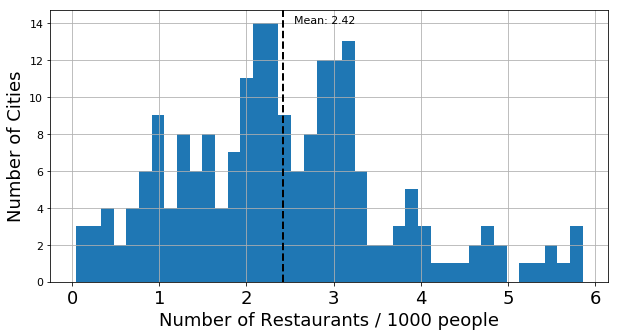

In [0]:
# Plot
plt.rcParams['figure.figsize'] = [10, 5]
city_counts_merge.num_poi_per_capita.hist(bins = 40)
plt.xlabel("Number of Restaurants / {0} people".format(per_capita_multiple))
plt.ylabel("Number of Cities")

# show mean
plt.axvline(summary['mean'], color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(summary['mean']*1.05 , max_ylim*0.95, 'Mean: {:.2f}'.format(summary['mean']))

plt.show()

In [0]:
print("The top 5 cities with the most retaurants / capita:")
city_counts_merge[['city', 'num_poi', 'Population', 'num_poi_per_capita']].sort_values('num_poi_per_capita', ascending = False).head(5)

The top 5 cities with the most retaurants / capita:


,city,num_poi,Population,num_poi_per_capita
99,independence,42,7167,5.860193
12,sandusky,142,24714,5.745731
28,north canton,99,17277,5.730161
84,canal winchester,48,8604,5.578801
47,maumee,76,13722,5.538551


In [0]:
print("The bottom 5 cities with the fewest retaurants / capita:")
city_counts_merge[['city', 'num_poi', 'Population', 'num_poi_per_capita']].sort_values('num_poi_per_capita', ascending = True).head(5)

The bottom 5 cities with the fewest retaurants / capita:


,city,num_poi,Population,num_poi_per_capita
205,green,1,25783,0.038785
204,new franklin,1,14168,0.070582
201,riverside,2,25151,0.079520
203,north college hill,2,9281,0.215494
202,wyoming,2,8576,0.233209


In [0]:
print("Our `min_pop_city` parameter defind above = {0}".format(min_pop_city))
print("The mean Population for our sample = {0:.0f}".format(city_counts_merge.Population.mean()))

Our `min_pop_city` parameter defind above = 7000
The mean Population for our sample = 31496


**A statistical footnote:**

It is worth noting that both the top 5 and bottom 5 lists contain cities with a Popluation that is very close to our `min_pop_city` value (compared to the mean value). 

This may not be a coicidence. Statistical variability is exacerbated in smaller population sizes. So it is expected (by random chance) to observe some unusually high and low rates in cities with smaller populations (e.g. It is more likely to observe 40% heads and 60% tails when you flip a fair coin only 10 times vs 10,000 times). A deeper analysis is needed to show confidently which cities are truly statistically unusual in terms of their restaurants per capita. 

### `open_hours`: What chain restaurants are open the longest each week?

* The `open_hours` column is structured as a json object of key:value pairs, one key for each day of the week. See more info in the [Places Manual: open_hours. ](https://docs.safegraph.com/docs/places-manual#section--open_hours-)
------------
I have 2 emprical questions that can be answered using `open_hours`: 
 
1.   Which brands have the largest number of restaurants open 24 hours a day, 7 days a week. 
2.   Which brands are open the most hours each week?

In [0]:
print("FYI here is an example of open_hours is structured")
print(sgCorePlaces.open_hours[0])

FYI here is an example of open_hours is structured
{ "Mon": [["6:00", "23:00"]], "Tue": [["6:00", "23:00"]], "Wed": [["6:00", "23:00"]], "Thu": [["6:00", "23:00"]], "Fri": [["6:00", "23:00"]], "Sat": [["6:00", "23:00"]], "Sun": [["6:00", "23:00"]] }


We can use the `json` module to convert these json into dictionary objects.

In [0]:
import json

sgCore_oh = sgCorePlaces[~sgCorePlaces.open_hours.isnull() & ~sgCorePlaces.brands.isnull()].copy() # only businesses with open_hours and has brand
sgCore_oh['open_hours_dict'] = [json.loads(oh) for oh in sgCore_oh.open_hours]

We can use a series of nested loops to unpack ("explode") these dictionary objects into a format more amenable for analysis. 

This method is adapted from the [SafeGraph FAQ: How do I work with the Patterns columns that contain JSON?](https://docs.safegraph.com/docs/faqs#section-how-do-i-work-with-the-patterns-columns-that-contain-json-)

In [0]:
"""
Construct a new dataframe with the each open and close windows 
separated into individual rows. 

The new dataframe will have the following columns: 
brands, sgpid, day, open_window

note: if a POI has > 1 open window (e.g. open from 10am - 2pm, and 5pm - 10pm), then it will have > 1 row in this dataset

See also:  https://docs.safegraph.com/docs/faqs#section-how-do-i-work-with-the-patterns-columns-that-contain-json-

"""


all_oh_data_list = [] # each open_hour window will be one element in this list
for index, row in sgCore_oh.iterrows():
  for key,value in row['open_hours_dict'].items():
    if(value==[]):
      # note: store is closed all day. 
      this_sgpid_oh_data = [ {'brands': row['brands'], 'safegraph_place_id' : row['safegraph_place_id'], 'day' : key, 'open_window' : []}]    
    else:
      this_sgpid_oh_data = [ {'brands': row['brands'], 'safegraph_place_id' : row['safegraph_place_id'], 'day' : key, 'open_window' : this_range} for this_range in value]  
    all_oh_data_list = all_oh_data_list + this_sgpid_oh_data # concat the lists
 
all_oh_data = pd.DataFrame(all_oh_data_list)

all_oh_data.head()

,brands,day,open_window,safegraph_place_id
0,McDonald's,Mon,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c
1,McDonald's,Tue,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c
2,McDonald's,Wed,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c
3,McDonald's,Thu,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c
4,McDonald's,Fri,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c


#### Which brands have the largest number of restaurants open 24 hours a day, 7 days a week?


Note: `['0:00', '24:00']` is how SafeGraph encodes that a restaurant that is open all 24 hours. 

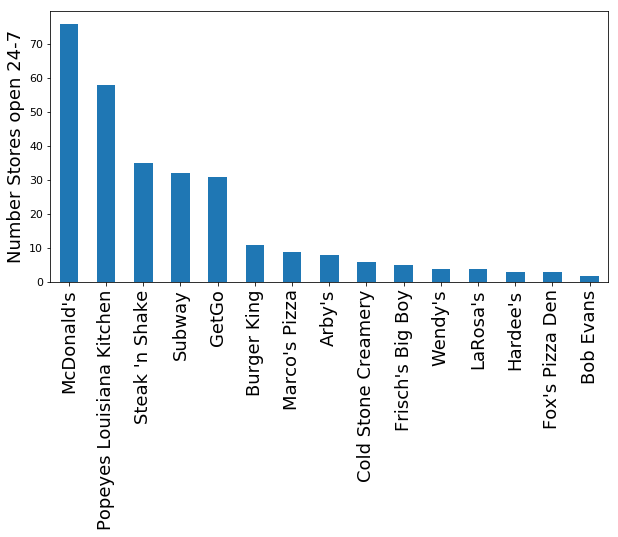

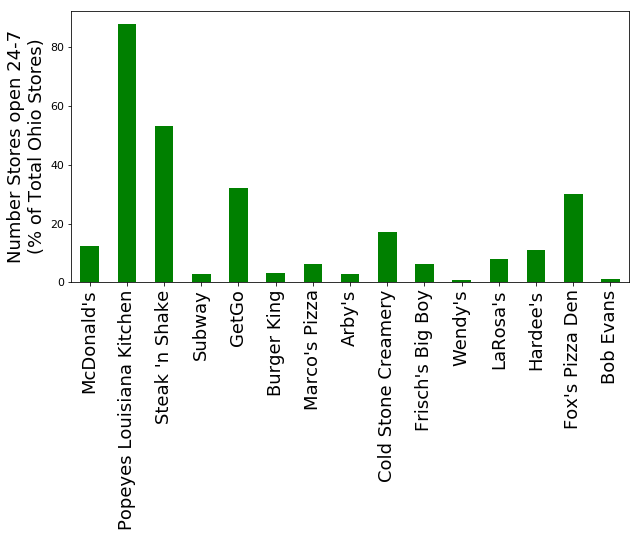

In [0]:
poi247 = all_oh_data[[ow == ['0:00', '24:00'] for ow in all_oh_data.open_window]]
brands_sgpid_count247 = poi247.groupby(['brands', 'safegraph_place_id'])['day'].nunique().to_frame(name = 'num_days').reset_index()
brands247 = brands_sgpid_count247[brands_sgpid_count247.num_days == 7].groupby(['brands'])['safegraph_place_id'].nunique().to_frame(name = 'num_poi_open_247').reset_index().sort_values('num_poi_open_247', ascending = False)

total_poi_counts = sgCorePlaces.groupby(['brands'])['safegraph_place_id'].count().to_frame(name = 'total_poi').reset_index()
brands247_merge = pd.merge(brands247.iloc[0:15], total_poi_counts, on = 'brands').sort_values('num_poi_open_247', ascending = False)
brands247_merge['fraction_open247'] = brands247_merge.num_poi_open_247 / brands247_merge.total_poi * 100.0


# Plot Fig 1
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels


brands247.iloc[0:15].plot.bar(x = 'brands', legend=False)
plt.ylabel('Number Stores open 24-7')
plt.xlabel('')

# Plot Fig 2
brands247_merge.plot.bar(x = 'brands', y = 'fraction_open247', color = 'g', legend=False)
plt.ylabel('Number Stores open 24-7\n(% of Total Ohio Stores)')
plt.xlabel('')
plt.show()

* McDonald's has the largest absolute number of 24-7 locations
* But Popeyes Louisiana Kitchen embraces 24-7 service more frequently in its stores.

#### Which brands are open the most hours each week?

To answer this we will have to break out the individual open and close hours into their own columns. 

In [0]:
def convert_hour_to_float(hour_str):
  return(np.float(hour_str.split(':')[0]) + np.float(hour_str.split(':')[1])/60.0)

all_oh_data['open_hour'] = [convert_hour_to_float(this_hours[0]) if this_hours else 0 for this_hours in all_oh_data.open_window]
all_oh_data['close_hour'] = [convert_hour_to_float(this_hours[-1]) if this_hours else 0 for this_hours in all_oh_data.open_window]
all_oh_data['num_hours_open'] = all_oh_data.close_hour - all_oh_data.open_hour
all_oh_data.head()

,brands,day,open_window,safegraph_place_id,open_hour,close_hour,num_hours_open
0,McDonald's,Mon,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c,6.0,23.0,17.0
1,McDonald's,Tue,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c,6.0,23.0,17.0
2,McDonald's,Wed,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c,6.0,23.0,17.0
3,McDonald's,Thu,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c,6.0,23.0,17.0
4,McDonald's,Fri,"[6:00, 23:00]",sg:01a45b65254d413b92633aa6a50a481c,6.0,23.0,17.0


Now calculate the average number of hours / week / restaurant within each brand. 

       total_open_hours      num_poi  avg_open_hours
count        125.000000   125.000000      125.000000
mean        5258.598667    55.416000       83.950272
std        13194.007751   129.061387       22.874288
min           77.000000     3.000000       11.000000
25%          501.000000     7.000000       74.625000
50%         1164.000000    16.000000       79.782609
75%         3993.000000    43.000000       94.661359
max       108756.750000  1119.000000      160.787879


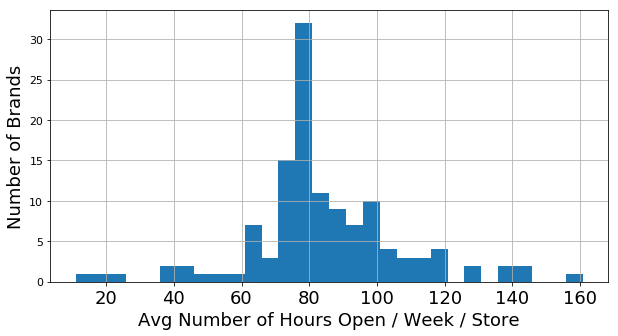

In [0]:
brand_open_hours = all_oh_data.groupby(['brands']).agg({'num_hours_open':'sum',
                                                        'safegraph_place_id': 'nunique'}).reset_index().rename(columns={'num_hours_open':'total_open_hours',
                                                                                                                        'safegraph_place_id':'num_poi'})
brand_open_hours['avg_open_hours'] = brand_open_hours.total_open_hours / brand_open_hours.num_poi
brand_open_hours = brand_open_hours[(brand_open_hours.num_poi > 2) & (brand_open_hours.avg_open_hours > 0)] # clean up some erroneous 0-hour records

# Plot
plt.rcParams['figure.figsize'] = [10, 5]
brand_open_hours['avg_open_hours'].hist(bins=30)

plt.xlabel('Avg Number of Hours Open / Week / Store')
plt.ylabel('Number of Brands')

print(brand_open_hours.describe())

The median brand is open ~ 80 hours / week / store (or 11.4 hours / day). 


In [0]:
print("The 10 brands with most hours / week / store:\n ")
brand_open_hours[['brands','avg_open_hours', 'num_poi']].sort_values('avg_open_hours', ascending=False).reset_index().iloc[0:10]


The 10 brands with most hours / week / store:
 


,index,brands,avg_open_hours,num_poi
0,165,Popeyes Louisiana Kitchen,160.787879,66
1,201,Steak 'n Shake,142.385246,61
2,78,Frisch's Big Boy,142.317073,82
3,76,Fox's Pizza Den,137.250000,6
4,82,GetGo,136.407216,97
5,131,McDonald's,126.523732,611
6,80,Fuzzy's Taco,126.000000,4
7,209,Taziki's,120.333333,3
8,233,White Castle,117.934211,19
9,35,Burger King,115.966865,336


### Thanks!
We hope this notebook provides some useful tips and inspiration for working with SafeGraph Core Places data. 

Feedback? Thoughts? Noticed an error? 

Please let us know: datastories@safegraph.com

\__

[Ryan Fox Squire](https://www.linkedin.com/in/ryanfoxsquire/), August 2019

SafeGraph

